# Exercises

In [7]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn import svm
import numpy as np
import pickle
import seaborn as sns
import sys
import os
sys.path.append(os.path.abspath("code"))
from utils import download_data
import warnings
warnings.filterwarnings('ignore')

sns.set_theme(context='notebook',style='white',font_scale=1.5,
              rc = {'axes.spines.top':False,'axes.spines.right':False})

from tqdm import tqdm

### Exercise 1
---
Use the sklearn `make_blobs()` function, in the same way that we used in the lesson, to generate a *non linearly separable* dataset with 2 features.  
Fit a linear SVM to the dataset many times, varying the slack hyperparameter $C$, and calculate the model performance in classifying the data.  
What is, approximately, a the best value of the $C$ hyperparameter for this dataset?

In [20]:
n = 100
ratio = .8
aux = int(n*ratio)
X,Y = make_blobs(n_samples=200,n_features =2,centers=[[-1,0],[1,0]],cluster_std=.8)
X_train = X[:aux]
X_test = X[aux:]
Y_train = Y[:aux]
Y_test = Y[aux:]

100%|███████████████████████████████████| 10000/10000 [00:05<00:00, 1901.28it/s]


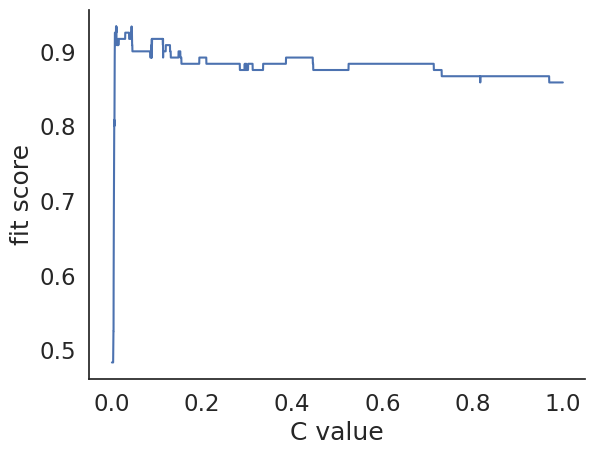

Highest score:0.933, C value:0.0091


In [25]:
C = np.linspace(0.0001, 1, 10000)
scores = []

for c in tqdm(C):
    svc_model = svm.SVC(kernel='linear',C=c);
    svc_model.fit(X_train, Y_train)
    score_ = svc_model.score(X_test,Y_test)
    #print(f'C={c}, score={score_:.3}')
    scores.append(score_)

plt.plot(C, scores)
plt.xlabel('C value')
plt.ylabel('fit score')
plt.show()
print(f'Highest score:{np.max(scores):.3}, C value:{C[np.argmax(scores)]}')

While the exact distribution of the scores depend on the randomly produced set of data, there is a trend showing that the best scores are usally found at a c value close to zero.

### Exercise 2
---
Repeat exercise 1, but using a non-linear SVM model (the sklearn class `SVC` uses [Radial Basis Functions](https://en.wikipedia.org/wiki/Radial_basis_function) as a default, check its documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)). 
To have a fairer assessment of the performance, train the model on a fraction (e.g. 80%) of the data, and test it on the other 20%.
Compare the performance of a linear SVC and a RBF SVC for dataset that are increaslingly non-linearly-separable.


In [28]:
def generateData(ratio ,n_samples, cluster_std):
    X,Y = make_blobs(n_samples=200,n_features =2,centers=[[-1,0],[1,0]],cluster_std=.8)
    return X[:ratio], X[ratio:], Y[:ratio], Y[ratio:] #Xtrain, Xtest, Ytrain, Ytest

def GetRbfScores(C):
    scores = []
    for c in tqdm(C):
        svc_model = svm.SVC(kernel='rbf',C=c);
        svc_model.fit(X_train, Y_train)
        score_ = svc_model.score(X_test,Y_test)
        #print(f'C={c}, score={score_:.3}')
        scores.append(score_)
    return scores

def GetLinScores(C):
    scores = []
    for c in tqdm(C):
        svc_model = svm.SVC(kernel='linear',C=c);
        svc_model.fit(X_train, Y_train)
        score_ = svc_model.score(X_test,Y_test)
        #print(f'C={c}, score={score_:.3}')
        scores.append(score_)
    return scores

100%|███████████████████████████████████████████| 50/50 [00:06<00:00,  8.16it/s]


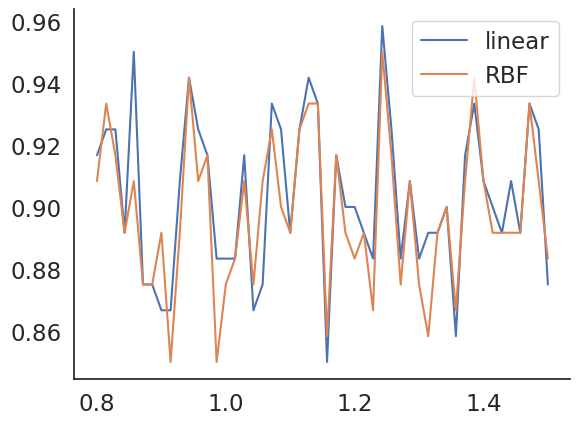

In [31]:
n = 100
ratio = int(n*.8)
C = np.linspace(0.0001, 0.5, 100)
std = np.linspace(0.8, 1.5)
best_scores_lin = []
best_scores_rbf = []

for std_ in tqdm(std):
    X_train, X_test, Y_train, Y_test = generateData(ratio, n, std_)
    scores_lin = []
    scores_rbf = []
    for c in (C):
        # - lin -
        svc_model = svm.SVC(kernel='linear',C=c);
        svc_model.fit(X_train, Y_train)
        scores_lin.append(svc_model.score(X_test,Y_test))
        # - rbf -
        svc_model_rbf = svm.SVC(kernel='rbf',C=c);
        svc_model_rbf.fit(X_train, Y_train)
        scores_rbf.append(svc_model_rbf.score(X_test,Y_test))
    best_scores_lin.append(np.max(scores_lin))
    best_scores_rbf.append(np.max(scores_rbf))
    
plt.plot(std, best_scores_lin, label='linear')
plt.plot(std, best_scores_rbf, label='RBF')
plt.legend()
plt.show()
    

100%|█████████████████████████████████████████| 50/50 [00:00<00:00, 7876.04it/s]


ValueError: x and y must be the same size

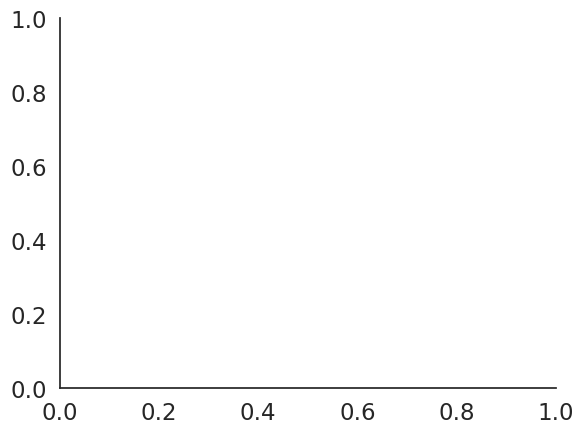

In [32]:
std = np.linspace(0.8, 1.5)
for std_ in tqdm(std):
    X_train, X_test, Y_train, Y_test = generateData(ratio, n, std_)
    
plt.scatter(X_train, Y_train)
plt.show()

### Exercise 3
---
Use the code below to simulate new data.
Generate data and then decode the stimulus identity, see how the decoding performance change when you change the following:

- The amplitude of the noise in the firing rate
- The amplitude of the stimulus modulation of the firing rate
- The number of neurons

Plot and comment.

## Useful code
---


In [2]:
n_cells = 20; # number of cells to simulate
n_stim_type = 2; # number of different stimuli
sigma_stim = 0.5 # amplitude of stimulus related modulation
average_firing_rate = 5; # average firing rate across the population

# generate baseline rates from exponential distirbution
cell_rate_baseline = np.random.exponential(average_firing_rate,size=n_cells)

# create stimulus average responses, perturbing the population firng rate profile
# we use a multiplicative modulation in opposite directions for the two stimuli
modulation = sigma_stim*np.random.normal(0,1,size=n_cells)
cell_rate_stim = {1: cell_rate_baseline * (1+modulation),2:cell_rate_baseline * (1-modulation)}
# sets negative firng rate to 0
cell_rate_stim[1][cell_rate_stim[1]<0]=0
cell_rate_stim[2][cell_rate_stim[2]<0]=0

In [3]:
# simulate spiking activity

s_rate = 10000 # the sampling rate of our emulated recording system
noise_rate = 1 # we are going to add some spike noise non related to the task
n_stim = 100 # number of stimuli

stim_dur = 2 #stimulus duration (in seconds)
is_interval = 3 # interval between stimuli  (in seconds)

stim_onsets = np.arange(0,n_stim*(stim_dur+is_interval),(stim_dur+is_interval)) # onset time of each stimulus (in seconds)
stim_type = np.asarray([1 for i in range(int(n_stim/2))]+[2 for i in range(int(n_stim/2))]) # identity of each stimulus
np.random.shuffle(stim_type)

time = np.arange(0,(n_stim+1)*(stim_dur+is_interval),1.0/s_rate) # vector of the sampled times.

spike_times = []
for cell in range(n_cells):
    spikes = np.random.poisson(cell_rate_baseline[cell]/s_rate,size=time.shape)
    for i,stimulus in enumerate(stim_type):
        stim_idxs = np.arange(stim_onsets[i]*s_rate,(stim_onsets[i]+stim_dur)*s_rate)
        spikes[stim_idxs] = np.random.poisson(cell_rate_stim[stimulus][cell]/s_rate,size=stim_idxs.shape)

    spike_times.append(time[spikes>0])



In [4]:
# save ouput
out_dict = {'spike_times':spike_times,
            'stim_onsets':stim_onsets,
            'stim_type':stim_type,
            'stim_duration':stim_dur
            }

with open('data/simulated_data1.pickle', 'wb') as handle:
    pickle.dump(out_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
